## This is the lab for "Machine Learning Course" 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

Let's plot the numerical features

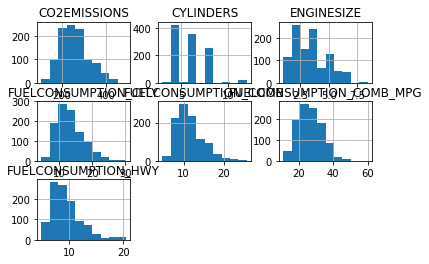

In [7]:
viz = cdf
viz.hist()
plt.show()

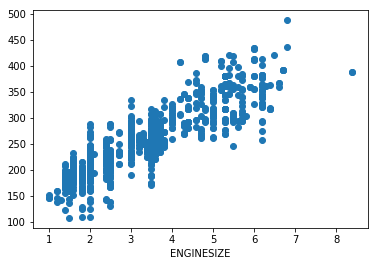

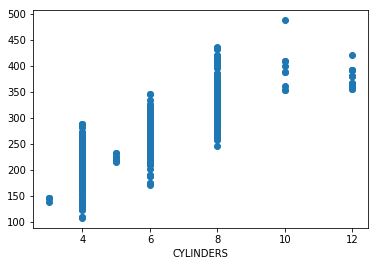

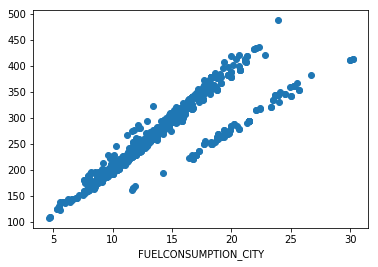

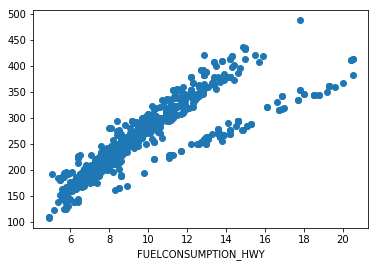

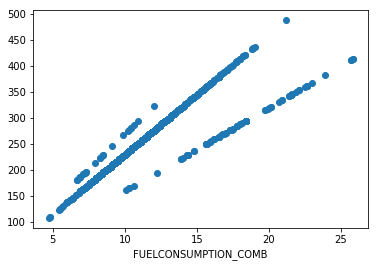

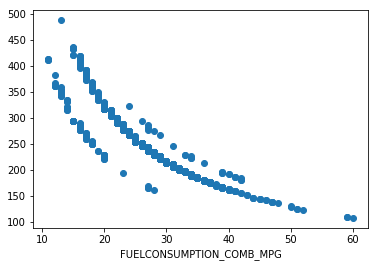

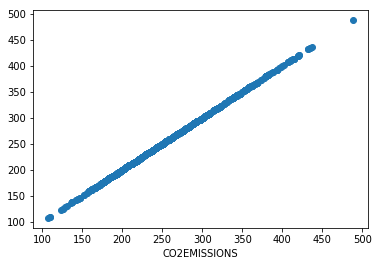

In [8]:
for i in cdf.columns:
    plt.scatter(cdf[i], df['CO2EMISSIONS'],)
    plt.xlabel(str(i))
    plt.show()

### Split the data manually

In [9]:
msk = np.random.rand(len(df))<0.8

In [10]:
train = cdf[msk]
test = cdf[~msk]
print('Size of training set: ', len(train))
print('Size of testing set: ', len(test))

Size of training set:  868
Size of testing set:  199


### Create visualizaton and build the model with training set (using only 1 features as "FUELCONSUMPTION_HWY")

In [11]:
x_train = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

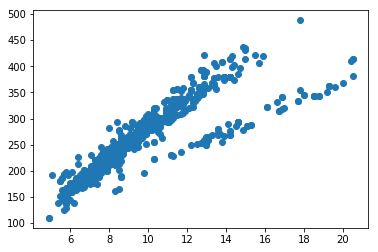

In [12]:
plt.scatter(x_train, y_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('Coefficent:',lm.coef_)
print('Intercept:',lm.intercept_)

Coefficent: [[19.26953669]]
Intercept: [73.48819171]


In [16]:
y_hat = lm.predict(x_test)

Evaluation

In [17]:
from sklearn.metrics import r2_score
mae = np.mean((np.absolute(y_test - y_hat)))
mse = np.mean((np.square(y_test - y_hat)))
r2 = r2_score(y_test, y_hat)
print('Mean absolute error: ', mae)
print('Mean Square error: ', mse)
print('R2 value: ', r2)

Mean absolute error:  24.686558492174584
Mean Square error:  1048.2693520910598
R2 value:  0.7364959791813708


---
---

## <font color = 'blue'>`SVM and  Logistic Regression`


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pylab as pl

In [19]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv'
df = pd.read_csv(url)

In [20]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### <font color = 'red'>It seem like BareNuc has something wrong in one or few columns, let's drop it

In [22]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype(int)
print(len(df))

683


In [23]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Convert features into an array with "asarray"

In [24]:
x = np.asarray(df.iloc[:,1:-1])
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [25]:
y = np.asarray(df.Class)
y[:5]

array([2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 163)
print('Train size:', x_train.shape, y_train.shape)
print('Test size: ', x_test.shape, y_test.shape)

Train size: (546, 9) (546,)
Test size:  (137, 9) (137,)


In [28]:
from sklearn.svm import SVC

In [29]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_hat = clf.predict(x_test)
y_hat[:5]

array([4, 4, 4, 2, 2])

## Model evaluation

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[81,  6],
       [ 2, 48]])

In [33]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.98      0.93      0.95        87
           4       0.89      0.96      0.92        50

   micro avg       0.94      0.94      0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.94      0.94      0.94       137



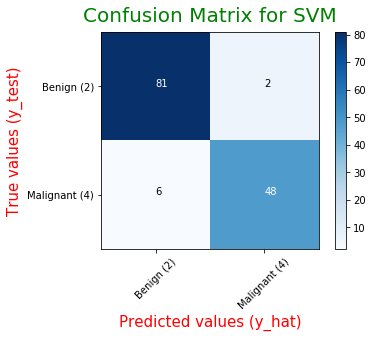

In [34]:
classes = ['Benign (2)', 'Malignant (4)']
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix for SVM', fontsize  = 20, pad = 10, color = 'green')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j :
            plt.text(i,j, cm[i,j], color = 'white')
        else:
            plt.text(i,j, cm[i,j], color = 'black')
plt.xlabel('Predicted values (y_hat)', fontsize = 15, color = 'red')
plt.ylabel('True values (y_test)', fontsize = 15, color = 'red')
plt.show()

### <font color = 'green'> Check the result with F1-Score and Jaccard index

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat,average = 'weighted')

0.9420418139181558

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.9416058394160584

In [37]:
clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_hat = clf.predict(x_test)

In [39]:
cm = confusion_matrix(y_test, y_hat)

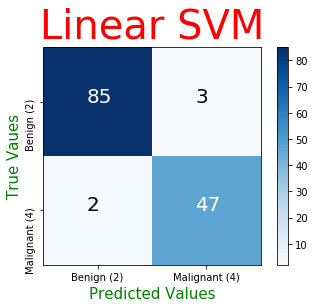

Classification report
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        87
           4       0.96      0.94      0.95        50

   micro avg       0.96      0.96      0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

F1_score =  0.9634235999199503


In [40]:
plt.imshow(cm, cmap = plt.cm.Blues)
plt.xticks (tick_marks, classes)
plt.yticks(tick_marks, classes, rotation = 90)
plt.xlabel('Predicted Values', fontsize = 15, color = 'green')
plt.ylabel('True Vaues', fontsize = 15, color = 'green')
plt.colorbar()
plt.title('Linear SVM', fontsize = 40, pad = 10, color = 'red')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j:
            plt.text(i-0.1,j, cm[i,j], color = 'white', fontsize = 20)
        else:
            plt.text(i-0.1,j, cm[i,j], color = 'black', fontsize = 20)
plt.show()
plt.close()

print('Classification report')
print(classification_report(y_test, y_hat))
print('F1_score = ', f1_score(y_test, y_hat, average = 'weighted'))

---
---

## <font color = 'blue'> K-MEANS CLUSTERING </font>
### Customer segmentation with KMeans

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [42]:
from sklearn.cluster import KMeans #import KMeans algorithm for clustering
from sklearn.datasets.samples_generator import make_blobs #generate isotropic Gaussian blobs for clustering

In [43]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv'
df = pd.read_csv(url)

In [44]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<font color = 'green'>Pre-processing</font>
- Address columns is not a feature for clustering, so we will drop it
- Since the columns are in numerical form with different magnitudes, we need to normalize them with "Standard Scaler"

In [45]:
df = df.drop('Address', axis = 1)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
x = df.values[:,1:]

In [48]:
#convert NaN into '0' and infinity into 'large finite number'
x = np.nan_to_num(x)

In [49]:
x1 = StandardScaler().fit_transform(x)
x1

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<font color = 'green'>Modeling</font>
- Using KMeans algorithm to cluster our customer with:
    - n_cluster: number of clusters as well as number of "centroids"
    - init: 'k-means++' : select intial clusters in a smart way to speed up convergence
    - n-init: number of iteration to do clustering when move the centroid
- Assign <font color = 'red'>"labels"</font> variable for k_means.labels_

In [50]:
k_means = KMeans(n_clusters = 3, init = 'k-means++' , n_init = 15)

In [51]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
labels = k_means.labels_

In [53]:
print(labels[:5])

[1 2 1 1 0]


In [54]:
# add labels into dataframe (assign each customer to the label that we clustered)
df['KMeans'] = labels

In [55]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,KMeans
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [56]:
#Check the centroid of each cluster by using "means"
df.groupby(by = 'KMeans').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
KMeans,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now we will visualize the distribution of the customer (age and income) and see how KMeans cluster them

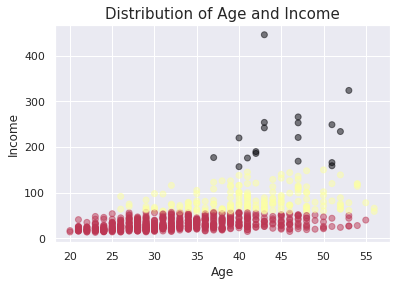

In [57]:
plt.scatter(df['Age'], df['Income'], c = labels, cmap = 'inferno',alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Distribution of Age and Income', fontsize = 15)
plt.show()

---
---
## CONTENT - BASED FILTERING
Recommendation systems have become ubiquitous, and can be commonly seen in online stores, movie databases and jobb finders. 

### Import data

In [58]:
!wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
print('Unzipping...')
!unzip -o -j moviedataset.zip

--2020-08-28 15:01:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

100%[======================================>] 160,301,210 43.7MB/s   in 3.6s   

2020-08-28 15:01:31 (42.5 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

Unzipping...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv                


### Preprocessing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
movies_df = pd.read_csv('movies.csv')
rating_df = pd.read_csv('ratings.csv')

In [61]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


- In ***title*** column, let's remove the year and put them into a new column called ***"year"***
- Split the ***Genres*** into a list
- Use ***One hot encoding*** to convert lists of genres into each column correspond to possible values of features

In [63]:
# Extract years from the title and put them in a new column called "years"
movies_df['years'] = movies_df['title'].str.extract('(\(\d\d\d\d\))',expand = False)

#Delete parentheses in years
movies_df.years = movies_df.years.str.extract('(\d\d\d\d)',expand = False)

#Repace year in title by "(\(\d\d\d\d\))"" to ""
movies_df.title = movies_df.title.str.replace('(\(\d\d\d\d\))', " ")

In [64]:
#Split the elements in Genres and set them up as a list
movies_df.genres = movies_df.genres.str.split("|")

movies_df.head()

,movieId,title,genres,years
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [65]:
movies_onehot = movies_df.copy()

In [66]:
# Create a new column for each genre and fill in 1
for index, row in movies_onehot.iterrows():
    for genre in row['genres']:
        movies_onehot.at[index, genre] = 1
        
# Fill in "0" for all the NaN values
movies_onehot = movies_onehot.fillna(0)
movies_onehot.head()

,movieId,title,genres,years,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
rating_df = rating_df.drop('timestamp', axis = 1)

In [68]:
rating_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [69]:
movies_onehot.head(20)

,movieId,title,genres,years,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat,"[Action, Crime, Thriller]",1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Sabrina,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck,"[Adventure, Children]",1995,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Sudden Death,[Action],1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
user_input = [
    {'title': movies_onehot.at[15,'title'],'rating': 5},
    {'title': movies_onehot.at[20,'title'],'rating': 3.5},
    {'title': movies_onehot.at[100,'title'],'rating': 2},
    {'title': movies_onehot.at[150,'title'],'rating': 4},
    {'title': movies_onehot.at[200,'title'],'rating': 4.5}
]
input_movies = pd.DataFrame(user_input)
input_movies

,rating,title
0,5.0,Casino
1,3.5,Get Shorty
2,2.0,Mr. Wrong
3,4.0,"Addiction, The"
4,4.5,Total Eclipse


In [80]:
# Filtering out the movies by title
inputID = movies_df[movies_df['title'].isin(input_movies['title'].tolist())] #tolist convert series to a list
input_movies = pd.merge(inputID, input_movies)

# Drop unnecessary columns
input_movies = input_movies.drop(['genres','years'], axis = 1)

In [81]:
input_movies

,movieId,title,rating
0,16,Casino,5.0
1,21,Get Shorty,3.5
2,102,Mr. Wrong,2.0
3,152,"Addiction, The",4.0
4,202,Total Eclipse,4.5


In [86]:
input_movieid = input_movies['movieId'].tolist()

# Merge with the "One hot coding dataframe with the input_movieId"
user_movies = movies_onehot[movies_onehot['movieId'].isin(input_movieid)]

# Reset index and drop unnecessary columns
user_movies = user_movies.drop(['genres','years','movieId'], axis = 1)

In [87]:
user_movies

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
15,Casino,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Get Shorty,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,Mr. Wrong,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,"Addiction, The",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,Total Eclipse,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# We get weights of each genre by multiplying the rating with the one_hot coding
transpose_user_movie = user_movies.drop('title',axis = 1).transpose()
transpose_user_movie

,15,20,100,150,200
Adventure,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0
Comedy,0.0,1.0,1.0,0.0,0.0
Fantasy,0.0,0.0,0.0,0.0,0.0
Romance,0.0,0.0,0.0,0.0,1.0
Drama,1.0,0.0,0.0,1.0,1.0
Action,0.0,0.0,0.0,0.0,0.0
Crime,1.0,1.0,0.0,0.0,0.0
Thriller,0.0,1.0,0.0,0.0,0.0


In [103]:
print(input_movies.rating)

0    5.0
1    3.5
2    2.0
3    4.0
4    4.5
Name: rating, dtype: float64


In [107]:
user_profile = np.dot(transpose_user_movie,input_movies.rating)
user_profile

array([ 0. ,  0. ,  0. ,  5.5,  0. ,  4.5, 13.5,  0. ,  8.5,  3.5,  4. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [114]:
matrix_1 = movies_onehot.drop(['title','years','genres'],axis = 1)
matrix_1 = matrix_1.set_index('movieId')

matrix_2 = ((matrix_1*user_profile).sum(axis = 1)) / (user_profile.sum())

In [115]:
matrix_2.head()

movieId
1    0.139241
2    0.000000
3    0.253165
4    0.594937
5    0.139241
dtype: float64

In [117]:
recommendation = matrix_2.sort_values(ascending = False)
recommendation.head()

movieId
27781    1.000000
76153    0.898734
4719     0.898734
75408    0.898734
3893     0.898734
dtype: float64

In [129]:
recommendation_final = movies_df[movies_df['movieId'].isin(recommendation.head(10).keys())] 
#key for index as we set up movieId as Index in that table
recommendation_final

,movieId,title,genres,years
1829,1912,Out of Sight,"[Comedy, Crime, Drama, Romance, Thriller]",1998
3801,3893,Nurse Betty,"[Comedy, Crime, Drama, Romance, Thriller]",2000
4625,4719,Osmosis Jones,"[Action, Animation, Comedy, Crime, Drama, Roma...",2001
7124,7235,Ichi the Killer (Koroshiya 1),"[Action, Comedy, Crime, Drama, Horror, Thriller]",2001
9488,27781,Svidd Neger,"[Comedy, Crime, Drama, Horror, Mystery, Romanc...",2003
15001,75408,Lupin III: Sweet Lost Night (Rupan Sansei: Swe...,"[Action, Animation, Comedy, Crime, Drama, Myst...",2008
15073,76153,Lupin III: First Contact (Rupan Sansei: Faasut...,"[Action, Animation, Comedy, Crime, Drama, Myst...",2002
26806,124681,Raffles,"[Adventure, Comedy, Crime, Drama, Romance, Thr...",1939
27514,127341,Longshot,"[Action, Comedy, Crime, Drama, Romance, Thriller]",2001
32433,144606,Confessions of a Dangerous Mind,"[Comedy, Crime, Drama, Romance, Thriller]",2002
